In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

In [2]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 

df_path = glob.glob('./HealthOrg/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)


healthorg_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in healthorg_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

healthorg_df["date"] = dates


In [6]:
# News_Outlets
df_path = glob.glob('./News_Outlets/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['name','tweet', 'date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

news_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in news_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

news_df["date"] = dates

C:\Users\Jennifer Tramsu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
# Individual
df_path = glob.glob('./Individual/*.csv')
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)

    except:
        continue

# other datasets in ./Political/datasets_other_format.txt, dunno how to parse
"""file = open("./Political/datasets_other_format.txt")
other = file.readlines()
other = [name.rstrip() for name in other]"""

ind_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in ind_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

ind_df["date"] = dates

In [32]:
# fake news

CMUID = pd.read_csv("./fake news/CMUID_hydrated.csv", index_col=0)
covidFake = pd.read_csv("./fake news/covidFakesID_reformatted.csv", index_col=0)
misinformation = pd.read_csv("./fake news/Misinformation_hydrated.csv", index_col=0)
fakeTweets = pd.read_csv("./Cross-SEAN Dataset/Fake_Tweets.csv", index_col=0)

fake = [CMUID, covidFake, misinformation, fakeTweets]

dfs = pd.concat(fake)

fake_dfs = dfs[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

# fix date

dates = fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

fake_dfs["date"] = dates
fake_dfs = fake_dfs.drop("created_at", axis=1)

<ipython-input-32-41f37b2db09e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_dfs["date"] = dates


In [33]:
# real tweets

realTweets = pd.read_csv("./Cross-SEAN Dataset/Real_Tweets.csv", index_col=0)
real_dfs = realTweets[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

# fix date

dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

real_dfs["date"] = dates
real_dfs = real_dfs.drop("created_at", axis=1)

<ipython-input-33-54934387b424>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_dfs["date"] = dates


'\nplt.figure(figsize=[30, 20])\nhealthorg_dates.sort_index().plot()\nind_dates.sort_index().plot()\nnews_dates.sort_index().plot()\nfake_tweets.sort_index().plot()\nreal_tweets.sort_index().plot()\nplt.legend(["healthorg", "ind", "news", "fake", "real"])\n'

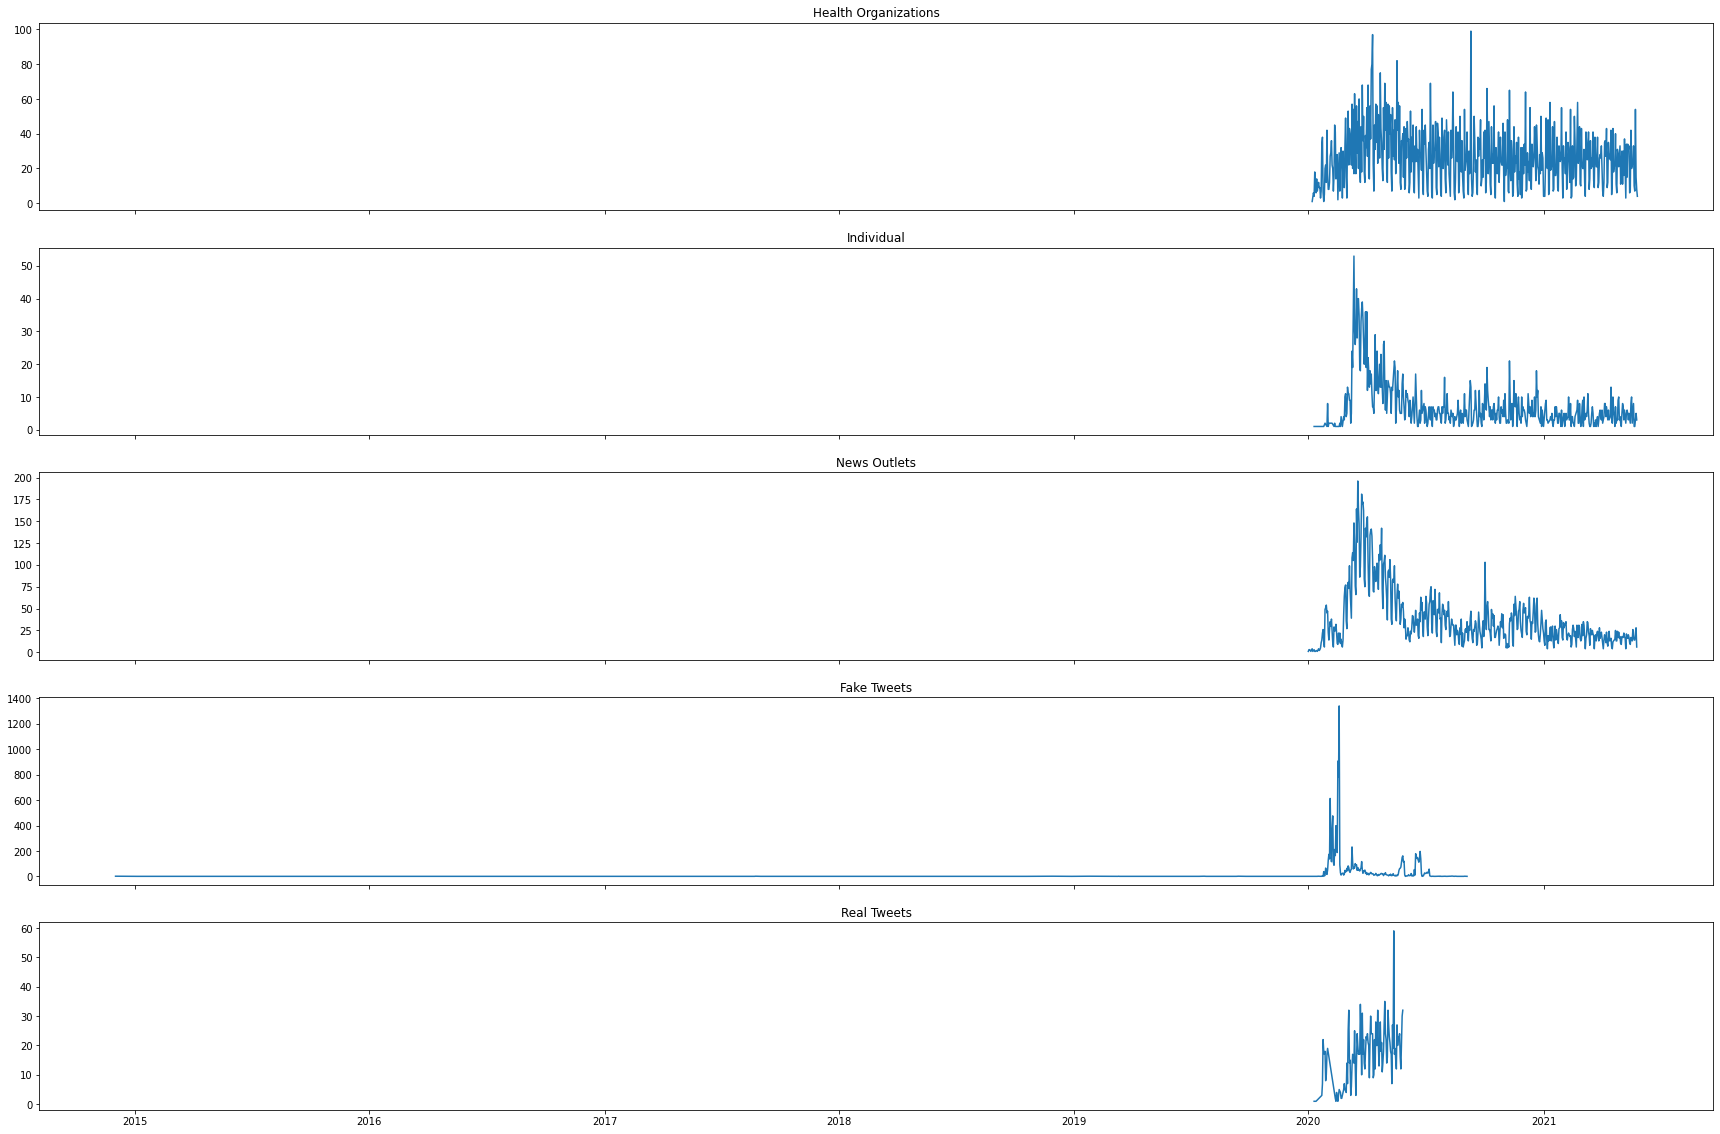

In [34]:
# plotting without weights

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
ind_dates = ind_df.sort_values("date", ascending=True)["date"].value_counts()
news_dates = news_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()

fig, axes = plt.subplots(5, 1, figsize=[30, 20], sharex=True)
axes[0].plot(healthorg_dates.sort_index())
axes[0].set_title("Health Organizations")
axes[1].plot(ind_dates.sort_index())
axes[1].set_title("Individual")
axes[2].plot(news_dates.sort_index())
axes[2].set_title("News Outlets")
axes[3].plot(fake_tweets.sort_index())
axes[3].set_title("Fake Tweets")
axes[4].plot(real_tweets.sort_index())
axes[4].set_title("Real Tweets")

'''
plt.figure(figsize=[30, 20])
healthorg_dates.sort_index().plot()
ind_dates.sort_index().plot()
news_dates.sort_index().plot()
fake_tweets.sort_index().plot()
real_tweets.sort_index().plot()
plt.legend(["healthorg", "ind", "news", "fake", "real"])
'''